In [1]:
rutaf = 'FORCE20_EquinorSintetic/fallas.npy'
ruta = 'FORCE20_EquinorSintetic/segy.npy'
prefijo ='FORCE'

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
sismica = np.load(ruta, mmap_mode= 'r')#['seis']
fallas = np.load(rutaf, mmap_mode= 'r')#['fault']

In [5]:
sismica.shape

(101, 589, 751)

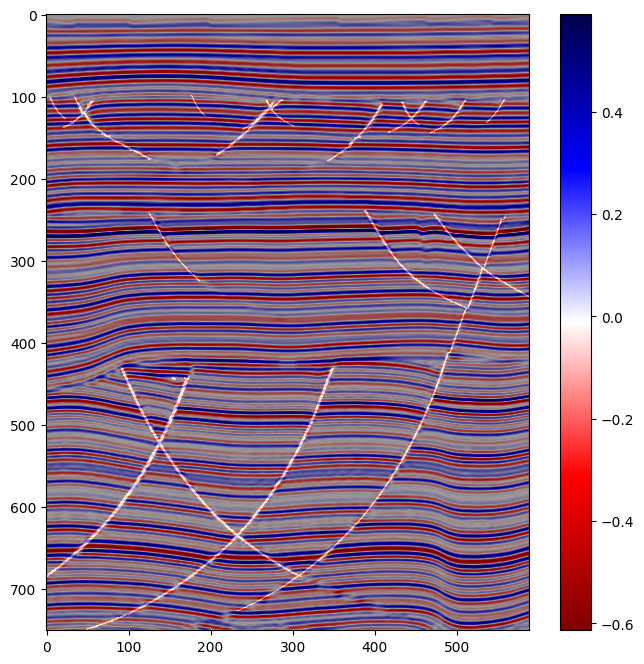

In [6]:
slice_index = 30

# Create a figure with two subplots side by side
plt.figure(figsize=(8, 8))

# Plot the cube slice
plt.imshow(sismica[slice_index, :, :].T, cmap='seismic_r', )
plt.colorbar()
plt.imshow(fallas[slice_index, :, :].T, cmap='hot', alpha=0.4)

plt.show()

CONVERTIR LOS CUBOS A SECCIONES 2D

In [5]:
from pathlib import Path
import numpy as np

def save_inlines_to_patches(array_3d, output_folder, patch_size=128, prefix='inline'):
    # Crear la carpeta si no existe
    output_path = Path(output_folder)
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Obtener dimensiones
    num_inlines, width, height = array_3d.shape
    
    # Calcular número de patches en cada dimensión
    num_patches_h = height // patch_size
    num_patches_w = width // patch_size
    
    # Iterar sobre cada inline
    for i in range(num_inlines):
        # Extraer el inline actual
        inline_2d = array_3d[i, :, :]
        
        # Dividir en patches
        for h in range(num_patches_h):
            for w in range(num_patches_w):
                # Extraer el patch
                h_start = h * patch_size
                h_end = (h + 1) * patch_size
                w_start = w * patch_size
                w_end = (w + 1) * patch_size
                               
                patch = inline_2d[h_start:h_end, w_start:w_end]

                if patch.size == 0:
                    continue
                if patch.shape != (128,128):
                    continue                                
                # Normalizar el patch entre 0 y 1
                patch_min = np.min(patch)
                patch_max = np.max(patch)

                if patch_max == patch_min:
                    patch_normalized = np.zeros_like(patch)
                else:
                    patch_normalized = (patch - patch_min) / (patch_max - patch_min)

                # Crear nombre del archivo incluyendo la posición del patch
                filename = f"{prefix}_{i:03d}_patch_{h:02d}_{w:02d}.npy"
                filepath = output_path / filename
                
                # Guardar el patch normalizado
                np.save(filepath, patch_normalized)

                #AUMENTO DE DATOS

                # Flip horizontal
                patch_flipped_h = np.fliplr(patch_normalized)
                filename_h = f"{prefix}_{i:03d}_patch_{h:02d}_{w:02d}_h.npy"
                filepath_h = output_path / filename_h
                np.save(filepath_h, patch_flipped_h)


                # Flip vertical
                patch_flipped_v = np.flipud(patch_normalized)
                filename_v = f"{prefix}_{i:03d}_patch_{h:02d}_{w:02d}_v.npy"
                filepath_v = output_path / filename_v
                np.save(filepath_v, patch_flipped_v)
    
    total_patches = num_inlines * num_patches_h * num_patches_w


def save_inlines_to_patchesf(array_3d, output_folderf, patch_size=128, prefix='inline'):
    # Crear la carpeta si no existe
    output_path = Path(output_folderf)
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Obtener dimensiones
    num_inlines, width, height = array_3d.shape
    
    # Calcular número de patches en cada dimensión
    num_patches_h = height // patch_size
    num_patches_w = width // patch_size
    
    # Iterar sobre cada inline
    for i in range(num_inlines):
        # Extraer el inline actual
        inline_2d = array_3d[i, :, :]
        
        # Dividir en patches
        for h in range(num_patches_h):
            for w in range(num_patches_w):
                # Extraer el patch
                h_start = h * patch_size
                h_end = (h + 1) * patch_size
                w_start = w * patch_size
                w_end = (w + 1) * patch_size
                
                patch = inline_2d[h_start:h_end, w_start:w_end]

                if patch.size == 0:
                    continue
                if patch.shape != (128,128):
                    continue
                                                
                # Crear nombre del archivo incluyendo la posición del patch
                filename = f"{prefix}_{i:03d}_patch_{h:02d}_{w:02d}.npy"
                filepath = output_path / filename
                
                # Guardar el patch normalizado
                np.save(filepath, patch)

                #AUMENTO DE DATOS

                # Flip horizontal
                patch_flipped_h = np.fliplr(patch)
                filename_h = f"{prefix}_{i:03d}_patch_{h:02d}_{w:02d}_h.npy"
                filepath_h = output_path / filename_h
                np.save(filepath_h, patch_flipped_h)


                # Flip vertical
                patch_flipped_v = np.flipud(patch)
                filename_v = f"{prefix}_{i:03d}_patch_{h:02d}_{w:02d}_v.npy"
                filepath_v = output_path / filename_v
                np.save(filepath_v, patch_flipped_v)
    
    total_patches = num_inlines * num_patches_h * num_patches_w


In [2]:
rutaf = 'A Gigabyte Interpreted Seismic Dataset for Automatic Fault Recognition/data/npzfiles/fault/faulttrain9.npz'
ruta = 'A Gigabyte Interpreted Seismic Dataset for Automatic Fault Recognition/data/npzfiles/seis/seistrain9.npz'
prefijo ='seistrain9'

In [7]:
sismica = np.load(ruta, mmap_mode= 'r')['arr_0']#['seis']
fallas = np.load(rutaf, mmap_mode= 'r')['arr_0']#['fault']

Ejecutar Sismica

In [8]:

    
# Definir carpeta de salida
output_folder = "Cubos_Formateados/A Gigabyte/Sismica"
    
# Ejecutar la función
save_inlines_to_patches(sismica, output_folder, patch_size=128, prefix=prefijo)


Ejecutar Fallas

In [9]:
# Definir carpeta de salida
output_folderf = "Cubos_Formateados/A Gigabyte/Fallas"

save_inlines_to_patchesf(fallas, output_folderf, patch_size=128, prefix=prefijo)

In [12]:
print(list(range(1)))

[0]


In [10]:
for i in range(2):
    ruta = f'A Gigabyte Interpreted Seismic Dataset for Automatic Fault Recognition/data/npzfiles/seis/seisval{i+1}.npz'
    rutaf = f'A Gigabyte Interpreted Seismic Dataset for Automatic Fault Recognition/data/npzfiles/fault/faultval{i+1}.npz'
    prefijo = f'seisval{i+1}'
    
    sismica = np.load(ruta, mmap_mode='r')['arr_0']
    fallas = np.load(rutaf, mmap_mode='r')['arr_0']
    
    output_folder = "Cubos_Formateados/A Gigabyte/Sismica"
    save_inlines_to_patches(sismica, output_folder, patch_size=128, prefix=prefijo)
    
    output_folderf = "Cubos_Formateados/A Gigabyte/Fallas"
    save_inlines_to_patchesf(fallas, output_folderf, patch_size=128, prefix=prefijo)

print("Processing complete.")

Processing complete.


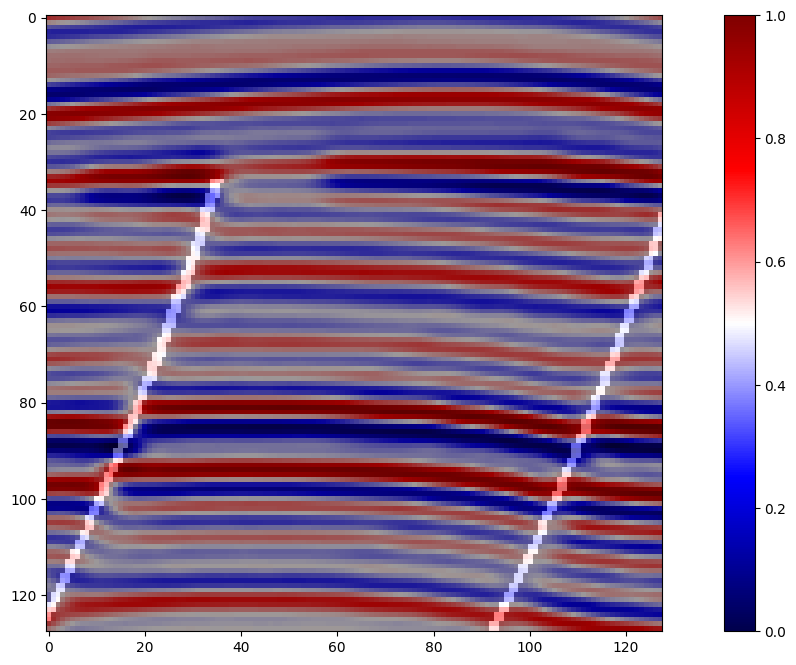

In [11]:
slice_index = 10

imag1 = np.load('Cubos_Formateados/FORCE20/Sismica/FORCE_001_patch_03_03.npy',mmap_mode='r')
imag2 = np.load('Cubos_Formateados/FORCE20/Fallas/FORCE_001_patch_03_03.npy',mmap_mode='r')


plt.figure(figsize=(16, 8))
plt.imshow(imag1.T, cmap='seismic', )
plt.colorbar()
plt.imshow(imag2.T, cmap='hot', alpha=0.4)

plt.show()
